In [1]:
# B.4.1  Confidence Intervals for Proportions

from statsmodels.stats.proportion import proportion_confint
proportion_confint(778, 1497, method='normal') # default
(0.4943973906940667, 0.545014766954564) # 95% Wald CI
proportion_confint(778, 1497, method='wilson')
(0.4943793119474541, 0.5449319688365669) # 95% Score CI


(0.4943793119474541, 0.5449319688365669)

In [5]:
# B.4.2 The t Distribution

import numpy as np
df = np.array([1, 10, 30, 100, 1000, 10000])
from scipy.stats import t
t.ppf(0.975, df) # 0.975-quantiles for specified df values


array([12.70620474,  2.22813885,  2.04227246,  1.98397152,  1.96233908,
        1.96020124])

In [4]:
t.cdf(1.96020124, 10000)

0.9750000000063903

In [9]:
# B.4.3 Confidence Intervals for Means

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Anor = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Anorexia.dat', sep='\s+')
Anor.head(3)





,subject,therapy,before,after
0,1,cb,80.5,82.2
1,2,cb,84.9,85.6
2,3,cb,81.5,81.4


In [10]:
change = Anor['after'] - Anor['before']
Anor['change'] = change # add new variable to the data frame
Anor.loc[Anor['therapy'] == 'cb']['change'].describe()




count    29.000000
mean      3.006897
std       7.308504
min      -9.100000
25%      -0.700000
50%       1.400000
75%       3.900000
max      20.900000
Name: change, dtype: float64

(0.22689015835877635, 5.7869029450894995)

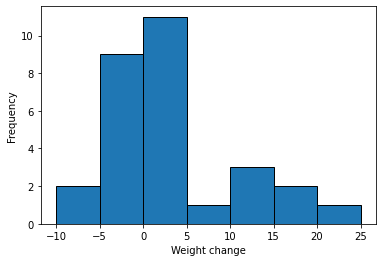

In [11]:
bins=list(range(-10,30,5)) # histogram with pre-specified bins:
plt.hist(Anor.loc[Anor['therapy']=='cb']['change'],
bins, edgecolor='k')
plt.xlabel('Weight change'); plt.ylabel('Frequency')
changeCB = Anor.loc[Anor['therapy'] == 'cb']['change']
import statsmodels.stats.api as sms
sms.DescrStatsW(changeCB).tconfint_mean() # default alpha=0.05

In [12]:
sms.DescrStatsW(changeCB).tconfint_mean(alpha=0.01)

(-0.7432794440477521, 6.757072547496028)

In [21]:
# B.4.4  Confidence Intervals Comparing Means and Comparing Propor-tions

import numpy as np
from scipy.stats import t
def t2ind_confint(y1, y2, equal_var = True, alpha = 0.05):
# y1, y2: vectors or data frames of values for groups A and B
    n1 = len(y1); n2 = len(y2)
    v1 = np.var(y1)*n1/(n1-1); v2 = np.var(y2)*n2/(n2-1)
    if equal_var:
        df = n1 + n2 - 2
        vardiff = ((n1-1)*v1+(n2-1)*v2)/(n1+n2-2)*(1/n1 + 1/n2)
    else:
        df = (v1/n1 + v2/n2)**2/(v1**2/(n1**2*(n1-1)) + v2**2/(n2**2*(n2-1)))
        vardiff = v1/n1 + v2/n2
    
    se = np.sqrt(vardiff)  
    qt = t.ppf(1 - alpha/2, df) # t quantile for 100(1-alpha)% CI
    mean_diff = np.mean(y1) - np.mean(y2)
    confint = mean_diff + np.array([-1, 1]) * qt * se
    conf = 1 - alpha
    return mean_diff, confint, conf, df

# returns: mean(A) - mean(B), CI for mu_A - mu_B, confidence level, df


# continue analysis from Section B.4.3 with Anor data file

cogbehav = Anor.loc[Anor['therapy']=='cb']['change']
control = Anor.loc[Anor['therapy']=='c']['change']
mean_diff, confint, conf, df = t2ind_confint(cogbehav,control)
print('mean1 - mean2 =', mean_diff) # assume equal variances
print(conf, 'confidence interval:', confint)
print('df =', df)

# mean1 - mean2 = 3.456896551724137
# 0.95 confidence interval: [-0.68013704 7.59393014]
# df = 53
print()
mean_diff, confint, conf, df = t2ind_confint(cogbehav,control, equal_var=False)
# permit unequal variances

print('mean1 - mean2 =', mean_diff)
print(conf, 'confidence interval:', confint)
print('df =', df)

mean1 - mean2 = 3.456896551724137
0.95 confidence interval: [-0.68013704  7.59393014]
df = 53

mean1 - mean2 = 3.456896551724137
0.95 confidence interval: [-0.70446319  7.61825629]
df = 50.97065330426786


In [22]:
import numpy as np
from scipy.stats import norm

def prop2_confint(y1, n1, y2, n2, alpha = 0.05):
    # y1, y2 : numbers of successes in groups A and B
    # n1, n2 : sample sizes in groups A and B
    prop1 = y1/n1; prop2 = y2/n2
    var = prop1*(1 - prop1)/n1 + prop2*(1 - prop2)/n2
    se = np.sqrt(var)
    qz = norm.ppf(1 - alpha/2) # standard normal quantile
    prop_diff = prop1 - prop2
    confint = prop_diff + np.array([-1, 1]) * qz * se
    conf = 1 - alpha
    return prop_diff, confint, conf # returns diff, CI, level

# call the function for data on prayers and coronary surgery

prop_diff, confint, conf = prop2_confint(315, 604, 304, 597)
print('prop1 - prop2 =', prop_diff)
print(conf, 'confidence interval:', confint)

# prop1 - prop2 = 0.012310448489689096
# 0.95 CI: [-0.04421536 0.06883625]

prop1 - prop2 = 0.012310448489689096
0.95 confidence interval: [-0.04421536  0.06883625]


17.0    (15.0, 23.0)
25.548688675899356    (15.552564154719057, 37.813783322956866)


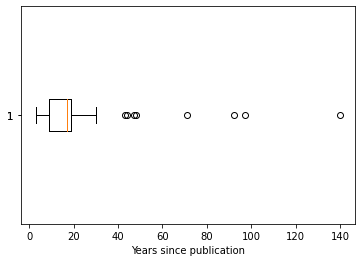

In [24]:
# B.4.5 Bootstrap Confidence Intervals
# Section 4.6.2 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
Books = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Library.dat', sep='\s+')
Books.head(3)

# C P # P = number of years since publication of book
# 0 1 3
# 1 9 9
# 2 4 4
np.median(Books['P'])
# 17.0

plt.boxplot(Books['P'], vert=False) # Box plot of 'P' with outliers
plt.xlabel('Years since publication')
plt.boxplot(Books['P'], vert=False, showfliers=False) # without outliers
plt.xlabel('Years since publication')

# pip install bootstrapped # needs to be done once
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

population = Books['P']
samples = np.array(population[:100000])

print(bs.bootstrap(samples, stat_func = bs_stats.median))
# 17.0 (15.0, 23.0) # bootstrap 95% CI for median of P

print(bs.bootstrap(samples, stat_func = bs_stats.std))
# 25.548688676 (15.567148, 37.952999) # bootstrap 95% CI for standard deviation





In [37]:
# B.4.6 Bayesian Posterior Intervals for Proportions and Means

from statsmodels.stats.proportion import proportion_confint
proportion_confint(814, 1142, method='jeffreys')
# (0.686028505, 0.738463665) # 95% Jeffreys posterior interval

import pymc3
from scipy.stats import beta

beta_dist = beta.rvs(size = 5000000, a = 814.5, b = 328.5)
# print(pymc3.stats.hpd(beta_dist, alpha=0.05))
# [0.68727542 0.73758295] # 95% HPD interval when use Jeffreys prior

import numpy as np
print('[',np.quantile(beta_dist, 0.025),',', np.quantile(beta_dist, 0.975),']')
# [ 0.6860454783123715 , 0.7384521768118637 ] # ordinary 95% posterior interval


[ 0.6859991977713934 , 0.738485384665883 ]


In [39]:
# continue analysis from Section B.4.3 with Anor data file
# (required is the variable: changeCB )
import numpy as np
from pymc3 import *
data = dict(y = changeCB)
B0=10**(-7) # using priors: inverse gamma,
with Model() as model:
    # define highly disperse priors for variance and mean
    sigma = InverseGamma('sigma', B0, B0, testval=1.)
    intercept = Normal('Intercept', 0, sigma=1/B0)
    # define likelihood function for normal responses
    likelihood = Normal('y',mu=intercept,sigma=sigma,observed=changeCB)
    trace = sample(50000, cores=2) # 100000 posterior samples
    
np.mean(trace['Intercept'])
# 3.007279525692707 # mean of posterior distribution
np.std(trace['Intercept'])
# 1.413687215567763 # standard deviation of posterior dist.

pymc3.stats.hpd(trace['Intercept'], alpha=0.05)
# array([0.31450337, 5.61027393]) # 95% posterior interval


C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS

Sampling 2 chains for 1_000 tune and 4_760 draw iterations (2_000 + 9_520 draws total) took 44 seconds.


AttributeError: module 'pymc3.stats' has no attribute 'hpd'

In [41]:
# B.5.3 Significance Tests for Means

import pandas as pd
Polid = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Polid.dat', sep='\s+')
Polid.head(2)
# race ideology
# 1 hispanic 1
# 2 hispanic 1

from scipy import stats
stats.ttest_1samp(Polid.loc[Polid['race']=='hispanic']['ideology'], 4.0)
# H_0 mean value is 4.0
# Ttest_1sampResult(statistic=1.2827341281592484, pvalue=0.20039257254280335)

import statsmodels.stats.api as sms
sms.DescrStatsW(Polid.loc[Polid['race']=='hispanic']['ideology']).tconfint_mean()
# (3.9523333438892, 4.2265284447287) # 95% CI for population mean

from scipy import stats
stats.ttest_1samp(Polid['ideology'], 4.0)
# Ttest_1sampResult(statistic=3.8455584366605935, pvalue=0.00012319510560068636)

import statsmodels.stats.api as sms
sms.DescrStatsW(Polid['ideology']). tconfint_mean()
# (4.05291076215289, 4.163011567944197) # 95% CI for mu




(4.05291076215289, 4.163011567944197)

In [44]:
# B.5.4 Significance Tests Comparing Means

# continue analysis from Section B.4.4 with Anor data file
# (required are the variables: cogbehav, control )

from scipy import stats
stats.ttest_ind(cogbehav, control, equal_var = True)

# Ttest_indResult(statistic=1.6759971256, pvalue=0.09962901351)
stats.ttest_ind(cogbehav, control, equal_var = False)

# Ttest_indResult(statistic=1.667749692, pvalue=0.1014985957)

import statsmodels.formula.api as sm
Anor2 = Anor.loc[Anor['therapy'] != 'f']
change = Anor2['after'] - Anor2['before']; Anor2['change']=change
mod = sm.ols(formula='change ~ C(therapy)', data=Anor2).fit()
print(mod.summary())

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
Anor2['x'] = LE.fit_transform(Anor2['therapy'])
x = np.array(Anor2['x']) # x=0 controls (c), x=1 therapy (cb)

from pymc3 import *
data = dict(x = x, y = change)
B0=10**(-8)
with Model() as model:
    # define very disperse prior distributions
    sigma = InverseGamma ('sigma', B0, B0, testval=1.)
    intercept = Normal('Intercept', 0, sigma = 1/B0)
    x_coeff = Normal('x', 0, sigma = 1/B0)
    # define likelihood function for normal response variable
    likelihood = Normal('y', mu = intercept + x_coeff * x,
                        sigma = sigma, observed = change)
    fit = sample(50000, cores=2) # posterior samples

summary(fit)

np.mean(fit['x'] < 0)





C:\Users\Lut Lat Aung\AppData\Local\Temp\ipykernel_5408\1703171569.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  change = Anor2['after'] - Anor2['before']; Anor2['change']=change
C:\Users\Lut Lat Aung\AppData\Local\Temp\ipykernel_5408\1703171569.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Anor2['x'] = LE.fit_transform(Anor2['therapy'])
C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object inste

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2.809
Date:                Thu, 29 Sep 2022   Prob (F-statistic):             0.0996
Time:                        16:05:30   Log-Likelihood:                -188.84
No. Observations:                  55   AIC:                             381.7
Df Residuals:                      53   BIC:                             385.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4500      1.498  

Initializing NUTS using jitter+adapt_diag...
C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 50_000 draw iterations (2_000 + 100_000 draws total) took 1341 seconds.


KeyboardInterrupt: 

In [45]:
# B.5.5 The Power of a Significance Test

import numpy as np
from statsmodels.stats.power import normal_power
normal_power(2*(np.arcsin(np.sqrt(0.5))-np.arcsin(np.sqrt(1/3))), 116, 0.05,
alternative = 'larger', sigma = 1.)


0.9780634871667954

In [47]:
# B.5.6 Nonparametric Statistics: Permutation Test and Wilcoxon Test

from mlxtend.evaluate import permutation_test
data1 = [114, 203, 217, 254, 256, 284, 296] # petting observations
data2 = [4, 7, 24, 25, 48, 71, 294] # praise observations
p_value = permutation_test(data1, data2)
print(p_value)

p_value = permutation_test(data1, data2, func='x_mean > y_mean')
print(p_value)

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(data1, data2, use_continuity = False,
alternative = 'greater')

print(stat,p) # approximate, based on large-sample distribution

0.007575757575757576
0.003787878787878788
43.0 0.00874125874125874


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.25 0.01      6.33

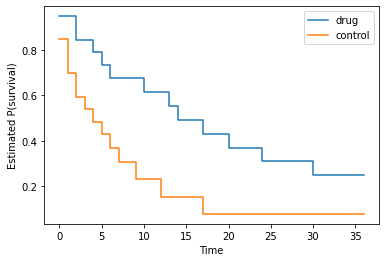

In [50]:
# B.5.7 Kaplan-Meier Estimation of Survival Functions

import pandas as pd
Survival=pd.read_csv('http://stat4ds.rwth-aachen.de/data/Survival.dat',sep='\s+')

import numpy as np
import pandas as pd
from lifelines import KaplanMeierFitter
kmf1 = KaplanMeierFitter() # creates class to create an object
kmf2 = KaplanMeierFitter()
groups = Survival['group']
i1 = (groups == 1) # group i1: drug
i2 = (groups == 0) # group i2: control
T = Survival['time']
E = Survival['status'] # Event occured (=1)
kmf1.fit(T[i1], E[i1], label='drug') # fits model for 1st group
a1 = kmf1.plot(ci_show=False)
a1.set_ylabel('Estimated P(survival)')
kmf2.fit(T[i2], E[i2], label='control') # fits model for 2nd group
a2 = kmf2.plot(ax=a1,ci_show=False)
a2.set_xlabel('Time')

from lifelines.statistics import logrank_test
results = logrank_test(T[i1],T[i2],event_observed_A=E[i1],event_observed_B=E[i2])
results.print_summary()




In [51]:
pip install lifelines

Note: you may need to restart the kernel to use updated packages.


In [52]:
# B.5.1 Significance Tests for Proportions

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest(524, 1008, 0.50)
print('{0:0.4f},'.format(stat),'{0:0.4f}'.format(pval))

from statsmodels.stats.proportion import proportion_confint
proportion_confint(524, 1008, method='wilson')



1.2609, 0.2074


(0.48898223316199607, 0.5505496516518761)

In [53]:
# The same Python function can test equality of two population proportions. Here is the
# code for the example of Section 5.4.2 comparing proportions suffering complications after
# heart surgery for prayer and non-prayer groups

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

count = np.array([315, 304]) # group 'success' counts
nobs = np.array([604, 597]) # group sample sizes
stat, pval = proportions_ztest(count, nobs)
print('{0:0.4f},'.format(stat),'{0:0.4f}'.format(pval))


0.4268, 0.6695


                    Very happy  Pretty happy  Not too happy
Married             301.613445    556.216153     139.170401
Divorced/Separated  144.302521    266.113445      66.584034
Never married       202.084034    372.670401      93.245565
df          4
pvalue      0.0
statistic   197.407019249992


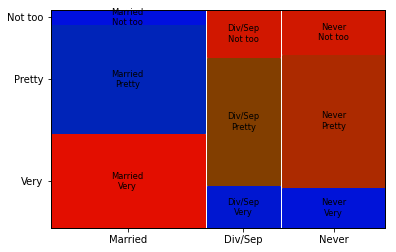

In [55]:
# B.5.2 Chi-Squared Tests Comparing Multiple Proportions in Contin-gency Tables

import numpy as np
import pandas as pd
import matplotlib as plt
Happy = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Happy.dat', sep='\s+')
rowlabel=['Married', 'Divorced/Separated', 'Never married']
collabel=['Very happy', 'Pretty happy', 'Not too happy']
table = pd.crosstab(Happy['marital'], Happy['happiness'], margins = False)
table.index=rowlabel
table.columns=collabel
table # output not shown
# conditional distributions on happiness (proportions within rows):

proptable = pd.crosstab(Happy['marital'], Happy['happiness'], normalize='index')

proptable.index=rowlabel
proptable.columns=collabel
proptable # output not shown

import statsmodels.api as sm # expected frequencies under H0: independence
table = sm.stats.Table(table)
print(table.fittedvalues) # output not shown

X2 = table.test_nominal_association() # chi-squared test of independence
print(X2)

table.standardized_resids # standardized residuals (not shown)
Happy.loc[Happy['happiness'] == 1, 'happiness'] = 'Very'
Happy.loc[Happy['happiness'] == 2, 'happiness'] = 'Pretty'
Happy.loc[Happy['happiness'] == 3, 'happiness'] = 'Not too'
Happy.loc[Happy['marital'] == 1, 'marital'] = 'Married'
Happy.loc[Happy['marital'] == 2, 'marital'] = 'Div/Sep'
Happy.loc[Happy['marital'] == 3, 'marital'] = 'Never'

from statsmodels.graphics.mosaicplot import mosaic
fig, _ = mosaic(Happy, ['marital','happiness'], statistic=True)

In [63]:
# B.6.5 Categorical Explanatory Variables in Linear Models

import pandas as pd
import statsmodels.formula.api as smf
Income = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Income.dat', sep='\s+')

Income.head(1)

import statsmodels.api as sm
# sm.stats.anova_lm(fit) # ANOVA table


import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(Income['income'], Income['race'])
post_hoc_res = comp.tukeyhsd()
print(post_hoc_res.summary())

fit2 = smf.ols(formula = 'income ~ C(race) + education', data=Income).fit()
print(fit2.summary()) # part of the output

sm.stats.anova_lm(fit2, typ=2) # Type II sums of squares

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     B      H     3.25 0.8959 -14.1308 20.6308  False
     B      W    14.73 0.0312   1.0886 28.3714   True
     H      W    11.48 0.1426  -2.8806 25.8406  False
-----------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     21.75
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           2.85e-10
Time:                        17:17:23   Log-Likelihood:                -330.52
No. Observations:                  80   AIC:                             669.0
Df Residuals:                      76   BIC:                         

,sum_sq,df,F,PR(>F)
C(race),1460.583947,2.0,3.055573,5.292198e-02
education,12245.231928,1.0,51.234580,4.422192e-10
Residual,18164.248072,76.0,NaN,NaN


In [5]:
# B.6.6 Bayesian Fitting of Linear Models

import matplotlib.pyplot as plt
from pymc3 import *
import pymc3
import statsmodels.api as sm
import pandas as pd
from pandas.plotting import scatter_matrix

Mental = pd.read_csv('http://stat4ds.rwth-aachen.de/data/Mental.dat', sep='\s+')
y = Mental.impair; life = Mental.life; ses = Mental.ses
B0 = 10**(-20); C0 = 10**(-10)
# model specifications in PyMC3 are wrapped in a with-statement:

with Model() as model: # define prior distributions
    sigma = InverseGamma ('sigma', C0, C0, testval=1.)
    Intercept = Normal('Intercept', 0, sigma=1/B0)
    beta1 = Normal('beta1', 0, sigma=1/B0) # very flat priors
    beta2 = Normal('beta2', 0, sigma=1/B0)
    # define likelihood function
    likelihood = Normal('y', mu=Intercept+beta1*life+beta2*ses,
                        sigma=sigma, observed = Mental.impair)
    trace = sample(100, cores=2) # 2x100000 posterior samples

summary(trace)

# sum(trace['beta1'] < 0)/200000 # analog of one-sided P-value
# sum(trace['beta2'] > 0)/200000 # analog of one-sided P-value

C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta2, beta1, Intercept, sigma]


Sampling 2 chains for 1_000 tune and 100 draw iterations (2_000 + 200 draws total) took 226 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
C:\Users\Lut Lat Aung\anaconda3\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,28.213,2.423,23.714,32.888,0.206,0.146,139.0,129.0,1.00
beta1,0.102,0.034,0.042,0.163,0.003,0.002,159.0,119.0,1.00
beta2,-0.097,0.032,-0.152,-0.036,0.003,0.002,146.0,132.0,1.00
sigma,4.618,0.571,3.830,5.902,0.049,0.036,171.0,97.0,1.01


Text(0, 0.5, 'Probability density function')

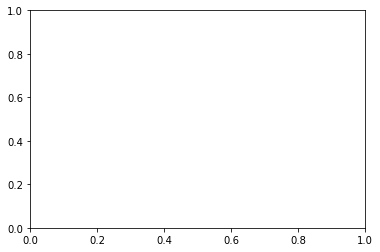

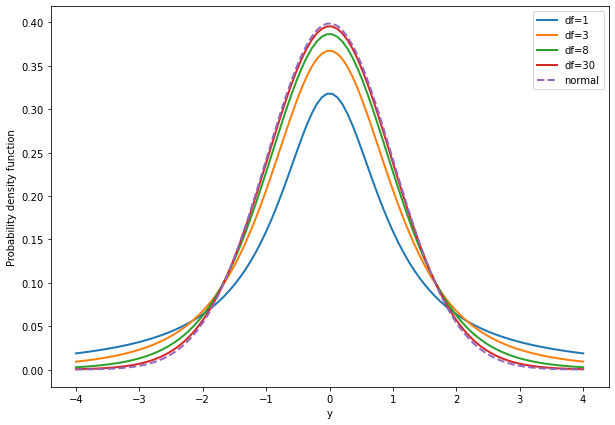

In [6]:
# 4.1 T-Distribution

import numpy as np
from scipy.stats import t
from scipy.stats import norm
from matplotlib import pyplot as plt
import statsmodels.api as sm
import pylab as py
fig, ax = plt.subplots()
df=np.array([1,3,8,30]) # degrees of freedom 
y = np.linspace(-4,4, 100)


def t_pdfs(): # function that creates plot as in Figure 4.5
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    for i in range(4):
        ax.plot(y, t.pdf(y, df[i]), lw=2)
    ax.plot(y, norm.pdf(y), lw=2, linestyle='dashed')
    ax.legend(['df=1','df=3','df=8','df=30','normal'],loc='upper right')
    
    
t_pdfs()#run the function
plt.xlabel("y")
plt.ylabel("Probability density function")

  Gender    isSmoker
0      M      Smoker
1      M      Smoker
2      M  Non-Smoker
3      F  Non-Smoker
4      F      Smoker
isSmoker  Non-Smoker  Smoker
Gender                      
F                 10      10
M                 10      20
isSmoker  Non-Smoker    Smoker
Gender                        
F           0.500000  0.500000
M           0.333333  0.666667
0.3767591178115821


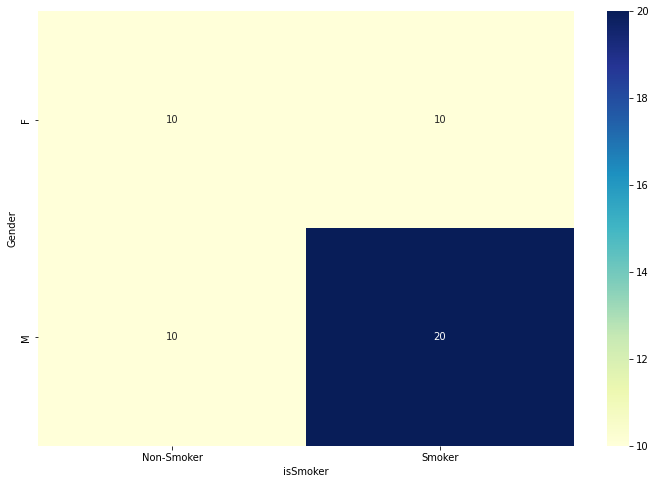

In [7]:
# Author - Ye Thu
# ID     - 611607

import pandas as pd
from scipy.stats import chi2_contingency

import seaborn as sns
import matplotlib.pyplot as plt

INSPECT = True  # flip to True to see outputs

df = pd.DataFrame({
    'Gender': ['M', 'M', 'M', 'F', 'F', ] * 10,
    'isSmoker': ['Smoker', 'Smoker', 'Non-Smoker', 'Non-Smoker', 'Smoker'] * 10
})

if INSPECT:
    print(df.head())

# convert data to contingency table
contingency = pd.crosstab(df['Gender'], df['isSmoker'])

if INSPECT:
    print(contingency)

# get percentages by gender
# normalize='columns' -> percentages by column
# normalize='all'     -> total percentage
contingency_pct = pd.crosstab(df['Gender'], df['isSmoker'], normalize='index')

if INSPECT:
    print(contingency_pct)

plt.figure(figsize=(12, 8))
sns.heatmap(contingency, annot=True, cmap='YlGnBu')

# chi-square test of independence
c, p, dof, expected = chi2_contingency(contingency)

if INSPECT:
    # print the p-value
    print(p)
    

# The p-value is 37.67% -> we do not reject the null hypothesis at 95% level of confidence
# The null hypothesis was that `Smokers` and `Gender` are independent
# The contingency table was 2×2, we could have applied z-test for proportions instead of chi-square test
# Chi-square test can be extended to m×n contingency tables


